<a href="https://colab.research.google.com/github/GabrielCdev/AUC_Metrics_Iris_Dataset/blob/main/quantitative_evaluation_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 02

Utilizar uma MLP para construir um modelo que classifique os diferentes tipos de flores usando o dataset da Iris, avaliando ao final o modelo no dataset de teste quanto às métricas precision, recall, specificity, AUC ROC e AUC PRC, além da accuracy
- Plote os gráficos de AUC ROC e PRC
- Investigue e estude os resultados à luz do que foi aprendido

\

Para o AUC ROC e AUC PRC, use as funções do sklearn:
- from sklearn.metrics import roc_curve
- from sklearn.metrics import roc_auc_score
- sklearn.metrics import precision_recall_curve
- from sklearn.metrics import auc

\

## Aluno

Gabriel Borges Calheiros

In [ ]:
# Imports
import numpy as np
import pandas as pd
from sklearn import metrics
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, classification_report

In [ ]:
# Load Iris dataset
iris = load_iris()

In [ ]:
# Load Data and Target
X = iris.data
y = iris.target

In [ ]:
# Transform targets to categorical
classe_dummy = np_utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, classe_dummy,
                                                    test_size=0.2, random_state=1)

In [ ]:
model = Sequential()
model.add(Dense(4, activation = 'relu', input_dim = 4))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 10
epochs = 200

history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/200
11/11 [==============================] - 1s 28ms/step - loss: 1.3473 - accuracy: 0.2963 - val_loss: 1.2870 - val_accuracy: 0.2500
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 1.2980 - accuracy: 0.2963 - val_loss: 1.2441 - val_accuracy: 0.2500
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 1.2569 - accuracy: 0.2963 - val_loss: 1.2143 - val_accuracy: 0.2500
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: 1.2250 - accuracy: 0.2963 - val_loss: 1.1865 - val_accuracy: 0.2500
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 1.1972 - accuracy: 0.3056 - val_loss: 1.1659 - val_accuracy: 0.2500
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 1.1776 - accuracy: 0.3056 - val_loss: 1.1474 - val_accuracy: 0.2500
Epoch 7/200
11/11 [==============================] - 0s 7ms/step - loss: 1.1590 - accuracy: 0.3148 - val_loss: 1.1338 - val_accuracy: 0.2500
Epoch 8/200


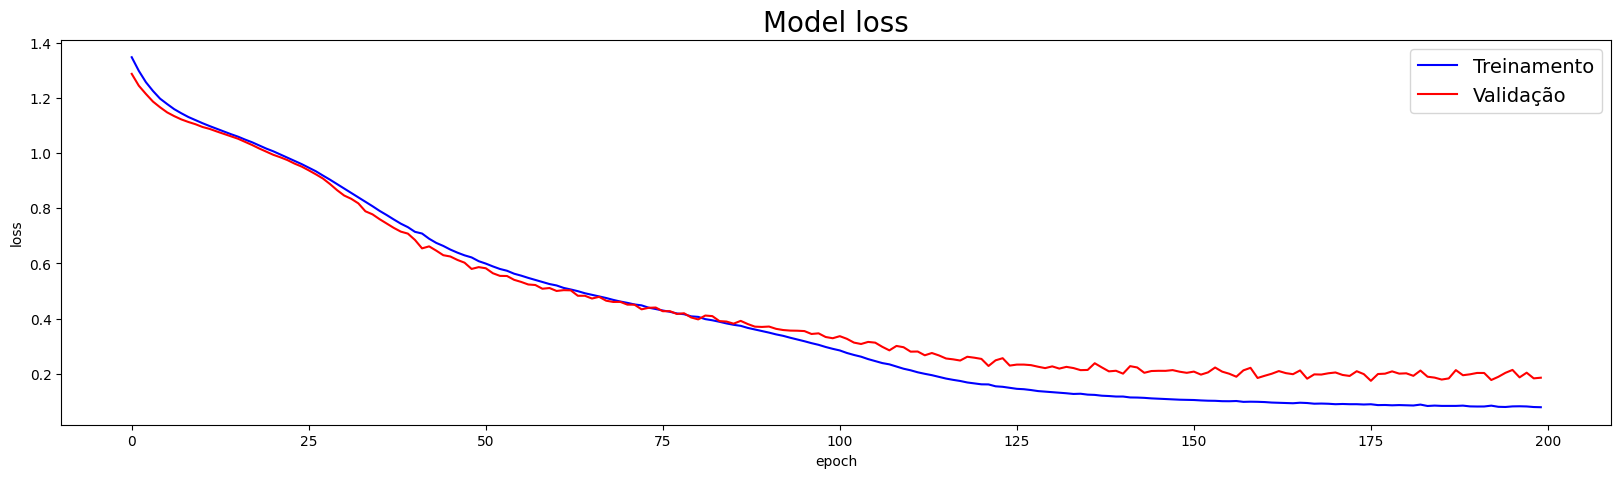

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()

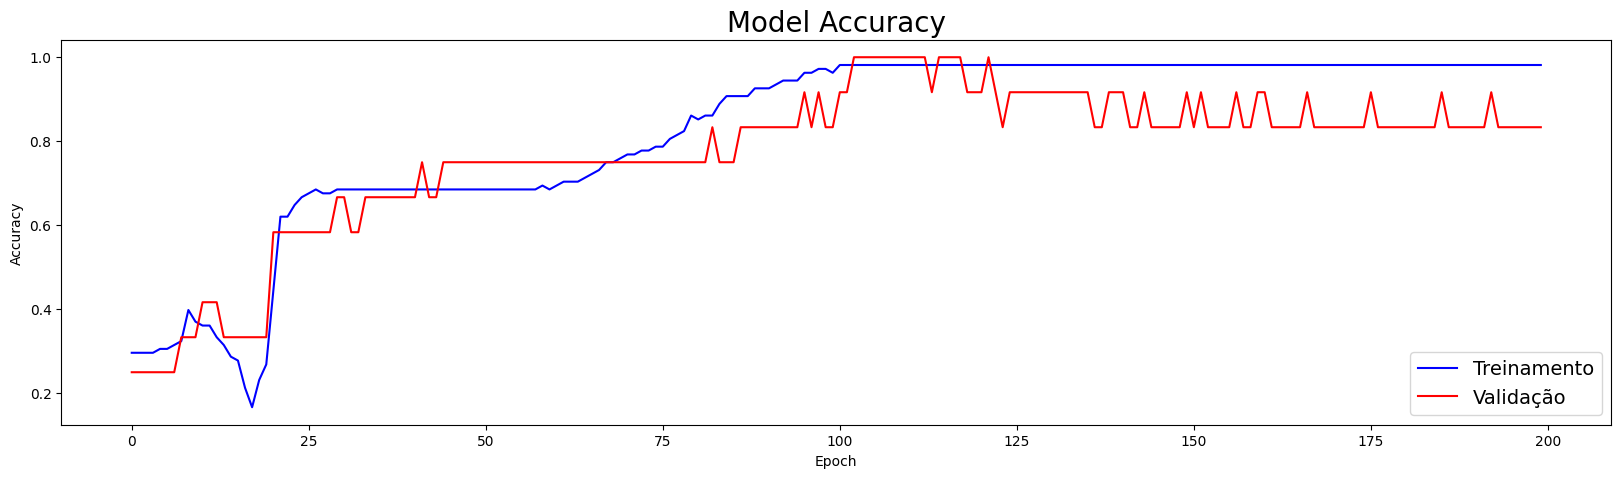

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='red')
plt.title('Model Accuracy', fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Treinamento', 'Validação'], loc='lower right', fontsize=14)
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1224333718419075
Test accuracy: 0.9666666388511658


In [ ]:
iris_index = 1

pred = model.predict(X_test)
print("Predito:",pred[iris_index].argmax(),"; Real:",y_test[iris_index].argmax())

1/1 [==============================] - 0s 86ms/step
Predito: 1 ; Real: 1


In [ ]:
y_pred = pred.argmax(axis=1)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_pred_bin = label_binarize(y_pred, classes=[0,1,2])

In [ ]:
# Acurácia
print(pd.crosstab(y_test.argmax(axis=1),pred.argmax(axis=1), rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  2  All
Real                   
0        11   0  0   11
1         0  12  1   13
2         0   0  6    6
All      11  12  7   30


In [ ]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



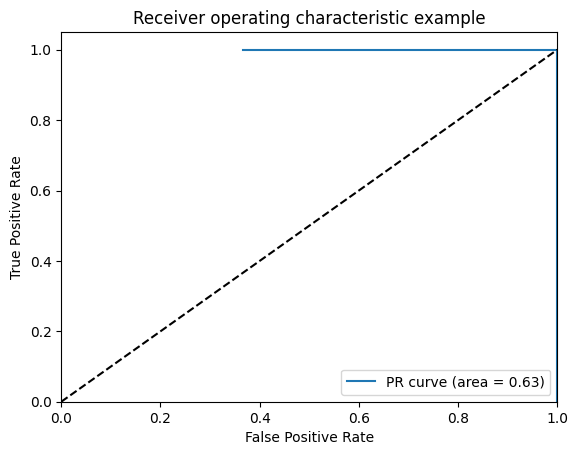

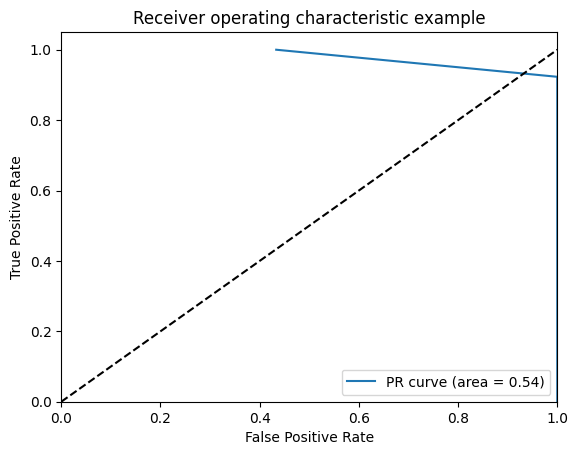

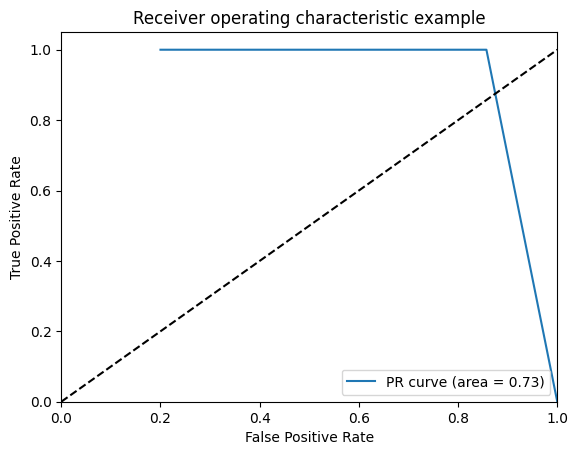

In [ ]:
num_classes = 3

# Compute ROC curve and ROC area for each class
y_score=y_pred_bin
y_test=y_test_bin
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='PR curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

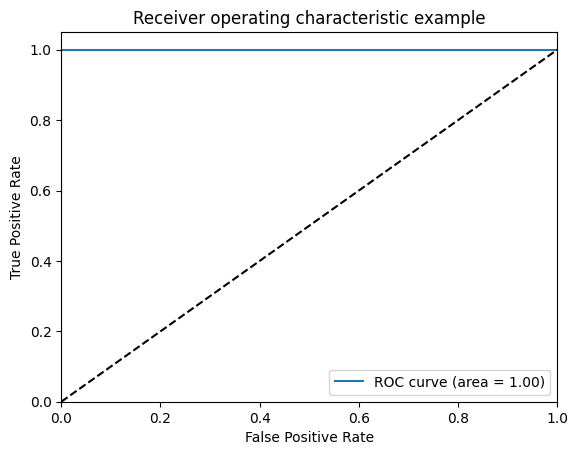

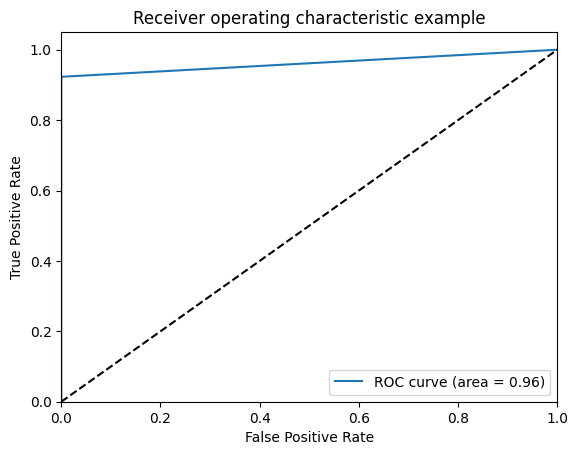

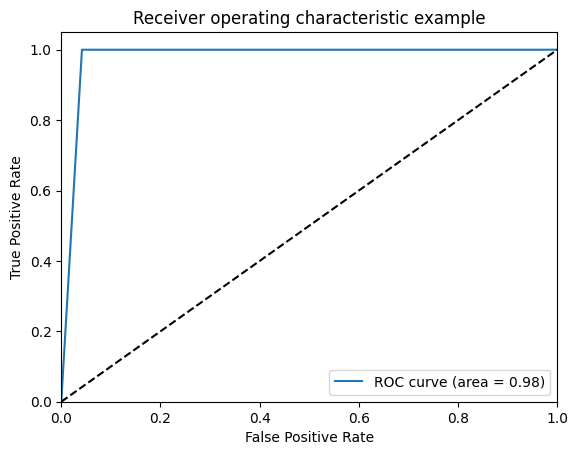

In [ ]:
# Compute ROC curve and ROC area for each class
y_score=y_pred_bin
y_test=y_test_bin
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()